In [133]:
# import numpy as np
# import matplotlib.pyplot as plt

# x = np.linspace(0, 8, 1000)
# y1 = [4, 7, 9]
# y2 = np.sin(x)
# y3 = np.arcsin(x)

# line, = plt.plot(y1)
# sine, = plt.plot(x, y2)
# arcsine, = plt.plot(x, y3)

# plt.legend(handles = [line, sine, arcsine], 
#            labels  = ['Line', 'Sine', 'Arcsine'])
# plt.show()

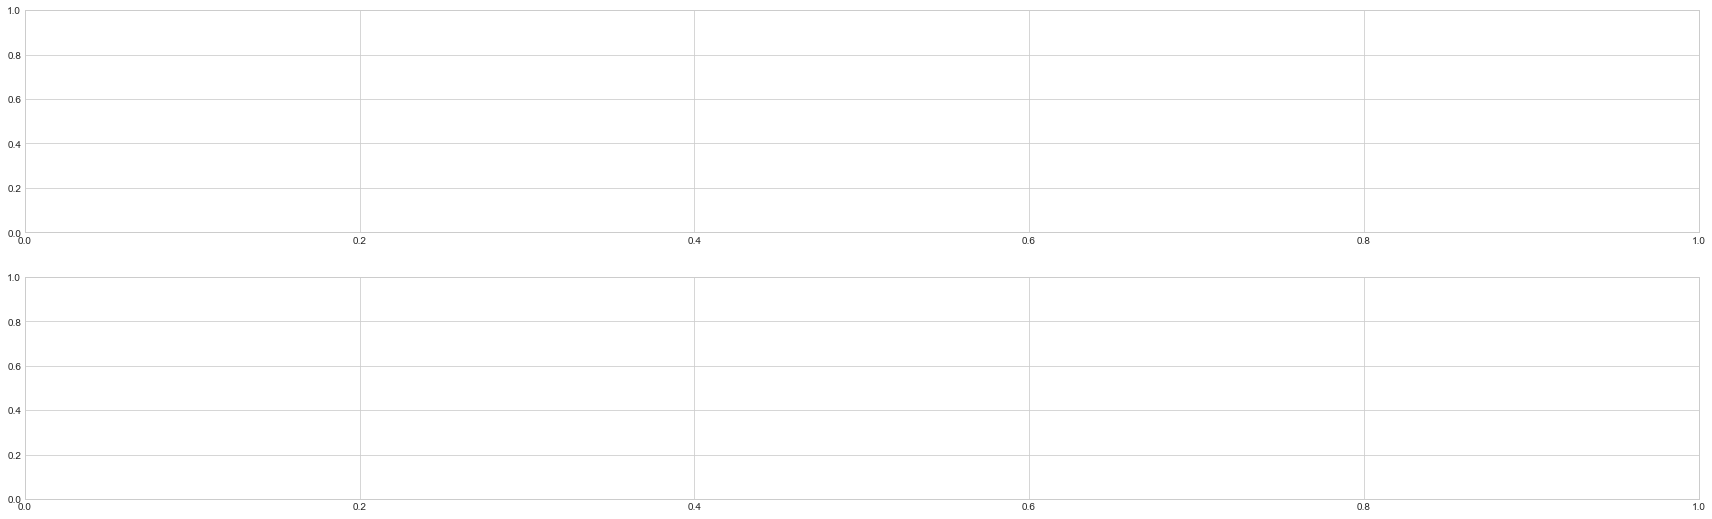

In [220]:
from turtle import width
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import date2num
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (30, 9)
fig,ax = plt.subplots(2,1)
date_form = DateFormatter("%m-%d")

In [221]:
def GetDataFrame(csv):
    dataframe = pd.read_csv(csv, skiprows=[1], delimiter='\t', parse_dates=[['date', 'time']])
    return dataframe
def GetDataFrameHPRCC(csv):
    dataframe = pd.read_csv(csv, skiprows=[1], delimiter=',', parse_dates=['DateTime'])
    return dataframe

In [230]:
def ETGraph(daily_summary: pd.DataFrame, HPRCC_data: pd.DataFrame, Title, plot_index):
    width = 0.4
    daily_summary = daily_summary.set_index('date_time')
    daily_summary = daily_summary.resample('D').sum()
    HPRCC_data = HPRCC_data.set_index('DateTime')
    daily_summary = daily_summary.join(HPRCC_data, how='inner')
    xvals = date2num(daily_summary.index)
    # plt.title(Title)
    # plt.ylim(0, 25)
    l1 = plt.bar(xvals-width*0.5, daily_summary['ET'], label='ET daily mm' + Title, width=0.2, align='center', color = 'red')
    l2 = plt.bar(xvals+width*0.5, daily_summary['ET-NE'], label='ETr mm' + Title, width=0.2, align='center', color = 'blue')
    plt.ylabel('ETc & ETr (mm)')
    # plt.xaxis.set_major_formatter(date_form)
    df = pd.DataFrame()
    df['Kc coefficient'] = daily_summary['ET']/daily_summary['ET-NE']
    df['Kc 2 day moving avg'] = df['Kc coefficient'].ewm(span=1).mean()
    df['date_time'] = daily_summary.index
    ax2[plot_index] = ax.twinx()
    ax2[plot_index].set_ylabel('Kc (ETc/ETr) daily')
    ax2[plot_index].set_ylim(0, 3)
    ax2[plot_index].xaxis.set_major_formatter(date_form)
    l3 = plt.plot(df['date_time'], df['Kc 2 day moving avg'], color='green')
    # ax[plot_index].legend(loc = 'upper left')
    # ax[plot_index].legend(loc ='upper left')
    # ax2.legend(loc = 'upper left')
    plt.legend([l1, l2, l3], ['ETr', 'ETc', 'Kc'])
    plt.show()

In [231]:
path_csv_Grant = r"G:\downloads\summary_report_2022-04-01_2022-09-02_grant.txt"
path_csv_CSP2 = r"G:\downloads\summary_report_2022-06-15_2022-09-02_csp2.txt"
path_refet_grant = r"G:\OneDrive - University of Nebraska-Lincoln\UNL\EC_Tower_Data_Check\ETref_Grant.csv"
path_refet_mead = r"G:\OneDrive - University of Nebraska-Lincoln\UNL\EC_Tower_Data_Check\ETref_Memphis.csv"

In [232]:
df_Grant = GetDataFrame(path_csv_Grant)
df_CSP2 = GetDataFrame(path_csv_CSP2)
df_refet_grant = GetDataFrameHPRCC(path_refet_grant)
df_refet_mead = GetDataFrameHPRCC(path_refet_mead)

AttributeError: 'numpy.ndarray' object has no attribute 'twinx'

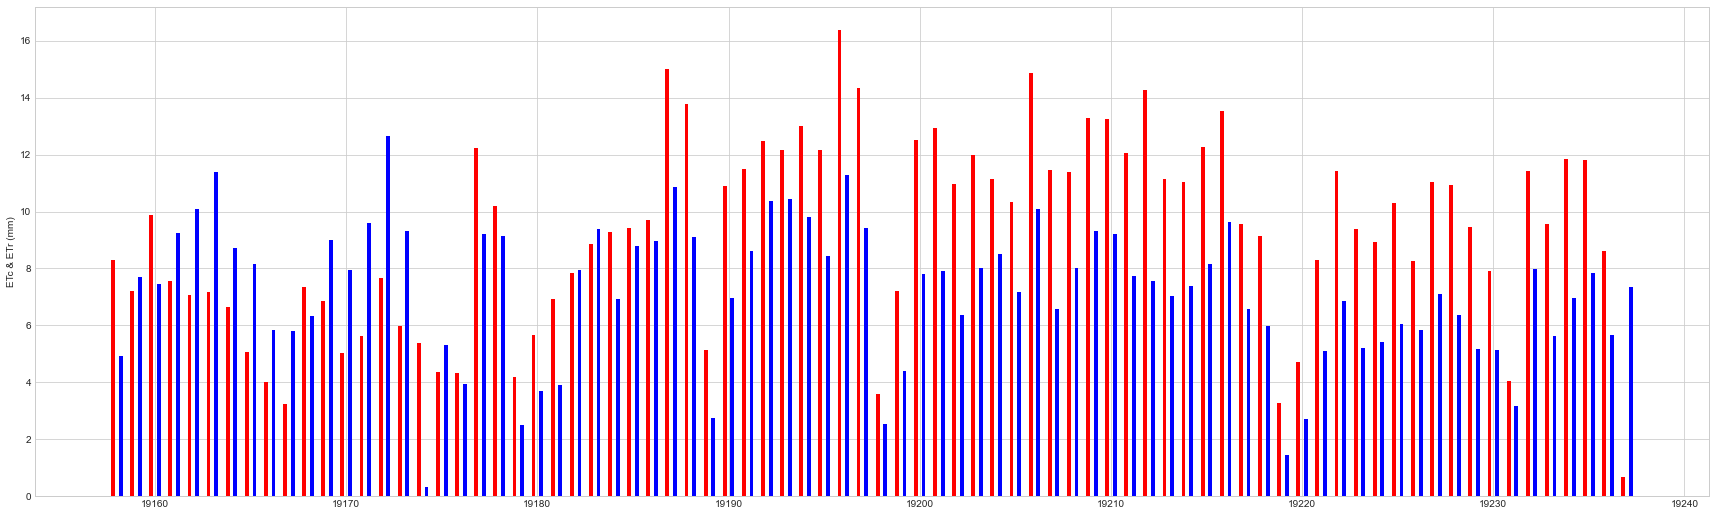

In [233]:
ETGraph(df_CSP2, df_refet_mead, 'CSP2, Mead NE (Soybeans)', 0)
ETGraph(df_Grant, df_refet_grant, 'GrantNE-01, Grant NE (Corn)', 1)

In [73]:
fig.tight_layout(pad=1.5)
plt.show()
plt.savefig('Compare Cumulative ET_ETr_1d.pdf')

<Figure size 806.4x453.6 with 0 Axes>

In [74]:
print("PDF files created for all sites.")

PDF files created for all sites.
